# Project: Investigate a Dataset - No Show Appointments

## Introduction

### Dataset Description 

This dataset was collected from a hundred thousand medical appointments in Brazil.
Various observations about each appointment were recorded.
This dataset focuses on whtehr or not the patients showed up for their scheduled appointments.

'PatientID' is the individual identifier for each patient.
'AppointmentID' is the identification number for each individual appointment scheduled.
'Gender' is the biolgical sex of the individual.
'ScheduledDay' is the day the patient scheduled the appointment.
'AppointmentDay' is the day the appointment is scheduled to take place.
'Age' is the age of the patient.
'Neighborhood' indicates the location of the hospital.
'Scholarship' is status of enrollment in the Brasilian welfare program.
'Hipertension' indicates whether or not the patient has a history of hypertension.
'Diabetes' indicates whether or not the patient has a history of diabetes.
'Alcoholism' indicates whether or not the patient has a history of alcoholism.
'Handcap' indicates whether or not the patient is handicapped.
'SMS_received' indicates if the patient was sent a text message reminder.
'No-show' indicated whether or not the patient was present for the appointment.


### Questions for Analysis

1. Is there any correlation between age and no-show appointments? 
  
  
2. What impact does being enrolled in the Brasilian welfare program (scholarship) have on the likelihood of patients showing up, if any?



### Importing Libraries

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Gathering

In [2]:
# Loading the dataset

appt_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

### Data Assessment

In [3]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
appt_df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
appt_df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
52440,3.135918e+13,5669055,F,2016-05-06T10:16:03Z,2016-05-10T00:00:00Z,48,ITARARÉ,0,0,0,0,0,1,Yes
60985,9.638866e+13,5650176,F,2016-05-03T07:30:52Z,2016-05-05T00:00:00Z,25,JESUS DE NAZARETH,0,0,0,0,0,0,No
57926,9.674512e+11,5691583,F,2016-05-12T13:17:10Z,2016-05-12T00:00:00Z,45,NOVA PALESTINA,0,0,0,0,0,0,No
50493,8.152148e+14,5673424,F,2016-05-09T09:20:39Z,2016-05-18T00:00:00Z,55,CENTRO,0,0,0,0,0,0,No
20830,6.535798e+11,5739186,F,2016-05-25T12:56:52Z,2016-05-31T00:00:00Z,68,ROMÃO,0,1,0,0,0,1,No
105949,1.281132e+12,5780019,M,2016-06-07T07:29:25Z,2016-06-07T00:00:00Z,4,SANTO ANDRÉ,0,0,0,0,0,0,No
56187,2.488331e+13,5673348,M,2016-05-09T09:13:18Z,2016-05-11T00:00:00Z,88,REPÚBLICA,0,1,0,0,0,0,No
19597,2.616696e+12,5688079,F,2016-05-12T06:35:46Z,2016-05-16T00:00:00Z,53,ILHA DO PRÍNCIPE,0,0,0,0,0,0,Yes
71028,8.137292e+13,5431703,M,2016-03-04T11:20:39Z,2016-05-06T00:00:00Z,42,FONTE GRANDE,0,1,0,0,0,1,No
8266,5.382568e+14,5655214,F,2016-05-03T16:15:49Z,2016-05-10T00:00:00Z,49,PRAIA DO CANTO,0,0,0,0,0,0,No


In [6]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The AppointmentID values are ints and should be strings. ScheduledDay and AppointmentDay should both be in datetime format instead of strings. Column names have typos, inconsistant capitilization, and inconsistant formatting. All yes or no columns, such as Alcoholism, SMS_recieved, and No-show, should be bolleans, instead of ints and strings.

### Data Cleaning

In [8]:
# Changing the column names to correct misspellings and to make them more concide and readable.

appt_df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment_day', 'age','neighbourhood', 
                   'bolsa_familia', 'hypertension', 'diabetes', 'alcoholism', 'handicapped', 'received_sms', 'arrival_status']

In [9]:
# Changing the data type of the appointment_id column to string

appt_df['appointment_id'] = appt_df['appointment_id'].astype(str)

In [10]:
# Changing the data type of the scheduled_day column to datetime

appt_df['scheduled_day'] = pd.to_datetime(appt_df.scheduled_day)

In [11]:
# Changing the data type of the appointment_day column to datetime

appt_df['appointment_day'] = pd.to_datetime(appt_df.appointment_day)

In [12]:
# Changing the data type of the bolsa_familia column to string and changing the values to 'Enrolled' and 'Not Enrolled'

appt_df['bolsa_familia'] = appt_df['bolsa_familia'].astype(str)
appt_df['bolsa_familia'] = appt_df['bolsa_familia'].apply(lambda x: 'Enrolled' if x == '1' else 'Not Enrolled')

In [13]:
# Changing the data type of the hypertension column to string and changing the values to 'Yes' and 'No'

appt_df['hypertension'] = appt_df['hypertension'].astype(str)
appt_df['hypertension'] = appt_df['hypertension'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [14]:
# Changing the data type of the diabetes column to string and changing the values to 'Yes' and 'No'

appt_df['diabetes'] = appt_df['diabetes'].astype(str)
appt_df['diabetes'] = appt_df['diabetes'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [15]:
# Changing the data type of the alcoholism column to string and changing the values to 'Yes' and 'No'

appt_df['alcoholism'] = appt_df['alcoholism'].astype(str)
appt_df['alcoholism'] = appt_df['alcoholism'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [16]:
# Changing the data type of the handicapped column to string and changing the values to 'Yes' and 'No'

appt_df['handicapped'] = appt_df['handicapped'].astype(str)
appt_df['handicapped'] = appt_df['handicapped'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [17]:
# Changing the data type of the received_sms column to string and changing the values to 'Yes' and 'No'

appt_df['received_sms'] = appt_df['received_sms'].astype(str)
appt_df['received_sms'] = appt_df['received_sms'].apply(lambda x: 'Yes' if x == '1' else 'No')

In [18]:
# Changing the data type of the arrival_status column to string and changing the values to 'Arrived' and 'Did Not Arrive'

appt_df['arrival_status'] = appt_df['arrival_status'].astype(str)
appt_df['arrival_status'] = appt_df['arrival_status'].apply(lambda x: 'Did Not Arrive' if x == 'Yes' else 'Arrived')

In [19]:
appt_df.sample(5)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,bolsa_familia,hypertension,diabetes,alcoholism,handicapped,received_sms,arrival_status
8623,9.963340e+13,5718928,M,2016-05-19 10:20:09+00:00,2016-05-31 00:00:00+00:00,35,DA PENHA,Not Enrolled,No,No,No,No,No,Did Not Arrive
55309,4.978975e+14,5710373,F,2016-05-17 15:55:18+00:00,2016-05-19 00:00:00+00:00,71,ITARARÉ,Not Enrolled,Yes,No,No,No,No,Arrived
50405,5.392281e+12,5674115,F,2016-05-09 10:26:25+00:00,2016-05-09 00:00:00+00:00,31,MÁRIO CYPRESTE,Not Enrolled,No,No,No,No,No,Arrived
67286,1.333989e+12,5666748,M,2016-05-06 07:01:43+00:00,2016-05-06 00:00:00+00:00,44,JARDIM CAMBURI,Not Enrolled,No,No,No,No,No,Arrived
72043,1.345274e+13,5691305,M,2016-05-12 12:01:13+00:00,2016-05-18 00:00:00+00:00,54,MARIA ORTIZ,Not Enrolled,No,No,No,No,No,Arrived


## Exploratory Data Analysis

### Examining the 'age' values

In [20]:
appt_df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [21]:
len(appt_df['age'].value_counts())

104

In [22]:
appt_df['age'].value_counts()[0:10:1]

0     3539
1     2273
52    1746
49    1652
53    1651
56    1635
38    1629
59    1624
2     1618
50    1613
Name: age, dtype: int64

In [23]:
appt_df['age'].value_counts()[104:93:-1]

-1       1
 99      1
 102     2
 100     4
 115     5
 98      6
 97     11
 96     17
 95     24
 94     33
Name: age, dtype: int64

In [24]:
round(appt_df['age'].mean(), 0)

37.0

My general insights from my assessment of the age values is that there are 104 different age values. Furthermore, the average age of patients is roughly 37. Also, it would seem that the highest age counts are during the late 40s to early 50s and after the age of 90 we have many of out lowest counts. I can think of no conclusions or actionable insights from this information, though it might be useful going forward.

## Questions 1:

### Is there any correlation between age and no-show appointments? 

In [25]:
# Count the number of occurrences of each age where arrival_status == 'No'
age_arrival_status_counts_no = appt_df[appt_df['arrival_status'] == 'Arrived'].groupby('age')['arrival_status'].count()

In [26]:
# Count the number of occurrences of each age where arrival_status == 'Yes'
age_arrival_status_counts_yes = appt_df[appt_df['arrival_status'] == 'Did Not Arrive'].groupby('age')['arrival_status'].count()

In [27]:
age_arrival_status_overall = appt_df.groupby('age')['arrival_status'].count()

In [28]:
age_grouped = appt_df.groupby(['age', 'arrival_status']).size().reset_index(name = 'counts')

In [29]:
# Create a pivot table to show the percentage of patients who did not arrive for their appointments

age_pivot = age_grouped.pivot(index = 'age', columns = 'arrival_status', values = 'counts')

age_pivot['Arrived'].fillna(0, inplace=True)

age_pivot['Did Not Arrive'].fillna(0, inplace=True)

age_pivot['Overall'] = age_pivot['Arrived'] + age_pivot['Did Not Arrive']

age_pivot['Percent Arrived'] = round((age_pivot['Arrived'] / age_pivot['Overall']) * 100, 2)

age_pivot['Percent Arrived'].fillna(100, inplace=True)

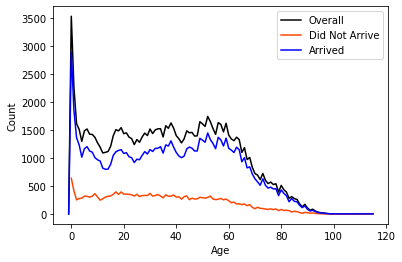

arrival_status,Arrived,Did Not Arrive,Overall,Percent Arrived
age,,,,
-1,1.0,0.0,1.0,100.00
0,2900.0,639.0,3539.0,81.94
1,1858.0,415.0,2273.0,81.74
2,1366.0,252.0,1618.0,84.43
3,1236.0,277.0,1513.0,81.69
4,1017.0,282.0,1299.0,78.29
5,1169.0,320.0,1489.0,78.51
6,1205.0,316.0,1521.0,79.22
7,1126.0,301.0,1427.0,78.91


In [30]:
# Plot the counts of each age
plt.plot(age_arrival_status_overall, label = 'Overall', color = 'black')
plt.plot(age_arrival_status_counts_yes.index, age_arrival_status_counts_yes.values, label = 'Did Not Arrive', color = 'orangered')
plt.plot(age_arrival_status_counts_no.index, age_arrival_status_counts_no.values, label='Arrived', color = 'blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

age_pivot.head(10)

## Questions 2:

### What impact does being enrolled in the Brasilian welfare program have on the likelihood of patients showing up, if any?

In [31]:
# Group the data by bolsa_familia and arrival_status and count the occurrences of each combination
bf_grouped = appt_df.groupby(['bolsa_familia', 'arrival_status']).size().reset_index(name = 'counts')

In [32]:
# Pivot the grouped data to create a table where each row represents a bolsa_familia value and each column represents a arrival_status value
bf_pivot = bf_grouped.pivot(index = 'bolsa_familia', columns = 'arrival_status', values = 'counts')

In [33]:
# Adding a column for the total number of appointments for each bolsa_familia value

bf_pivot['Percent Arrived'] = round((bf_pivot['Arrived'] / (bf_pivot['Did Not Arrive'] + bf_pivot['Arrived'])) * 100, 2)

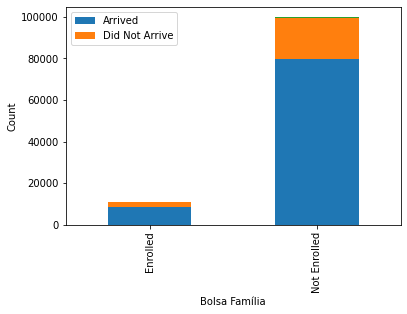

arrival_status,Arrived,Did Not Arrive,Percent Arrived
bolsa_familia,,,
Enrolled,8283,2578,76.26
Not Enrolled,79925,19741,80.19


In [34]:
# Plot the pivot table as a stacked bar plot
bf_pivot.plot(kind = 'bar', stacked = True)
plt.xlabel('Bolsa Família')
plt.ylabel('Count')
plt.legend(['Arrived', 'Did Not Arrive'], loc = 'upper left')
plt.show()

bf_pivot

## Conclusions

##### Question 1: Is there any correlation between age and no-show appointments? 

There is only a weak correlation between age and the likelihood that any one individual will show up for their appointment. The only real noteworthy variation in this is around 40 to 60 years old. However, this is still a negligible correlation. Although, the strongest correlation is with age and number of appointments overall. The number of overall scheduled appointments rises in early adulthood and begins to taper off towards ages of 60 and older.

##### Question 2: What correlation exists between being enrolled in the Brasilian welfare program and no-show appointments?

I have discovered through my analysis that the percentage of both enrolled and unenrolled individuals relative to their likelihood of showing up for their appointments is very similar. This leads me to believe that the Brasilian welfare program does not have a significant impact on the likelihood of patients showing up for their appointments. However, I have also observed here that the overall number of appointments scheduled for individuals enrolled in the Brasilian welfare program is significantly lower than the number of appointments scheduled for individuals not enrolled in the Brasilian welfare program. This could be due to the fact that the Brasilian welfare program is either not as widely known or utilized as it could be.

##### Limitations

The biggest limitation of this dataset is that a large number of outside factors are not documented. Thus leaving many takeaways based laregly on conjecture as opposed to statistical analysis. I feel that for the analysis to more accurate and informative other datasets would need to be utilised, such as census data, to provide a more complete picture of the population of patients, and perhaps a more complete understanding of the Brasilian welfare program to understand its reach and impact on the population. Without more information, it is difficult to draw any definitive conclusions from this dataset that could actually be impactful.

## OPTIONAL: Question for the reviewer

**Why did I need the update pandas line? I actually needed to comment it out when I was working on it on my local machine, and just left it out of the code entirely.**
**I would also like to request feedback on my choices for visualizations. I am not sure if I chose the best ones.**

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1